In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 43, 5

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data = data.dropna()
data['loan_status'].value_counts()

1    52413
0    16597
Name: loan_status, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69010 entries, 3 to 200188
Data columns (total 36 columns):
loan_amnt                     69010 non-null float64
term                          69010 non-null object
int_rate                      69010 non-null float64
installment                   69010 non-null float64
grade                         69010 non-null object
sub_grade                     69010 non-null object
emp_title                     69010 non-null object
emp_length                    69010 non-null object
home_ownership                69010 non-null object
annual_inc                    69010 non-null float64
verification_status           69010 non-null object
issue_d                       69010 non-null object
loan_status                   69010 non-null int64
pymnt_plan                    69010 non-null object
purpose                       69010 non-null object
zip_code                      69010 non-null object
addr_state                    69010 non-null object
dti

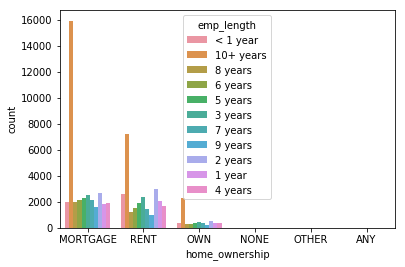

In [4]:
sns.countplot(x='home_ownership', hue='emp_length', data=data);

* Большая доля людей — это люди, работающие на одной работе более 10 лет и имеющие ипотеку.

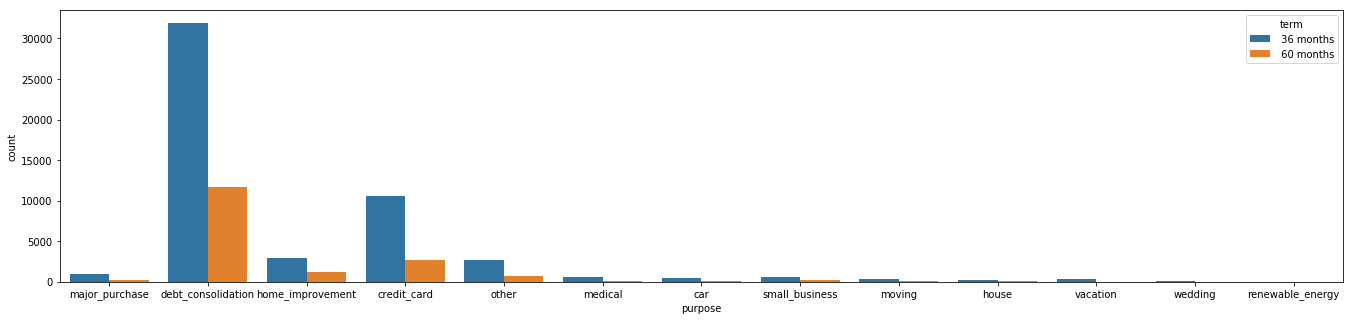

In [16]:
sns.countplot(x='purpose', hue='term', data=data);

* Большая доля кредитов оформляется для погашения предыдущих.
* Кредиты на 60 месяцев составляет примерно четверть от общего числа кредитов.

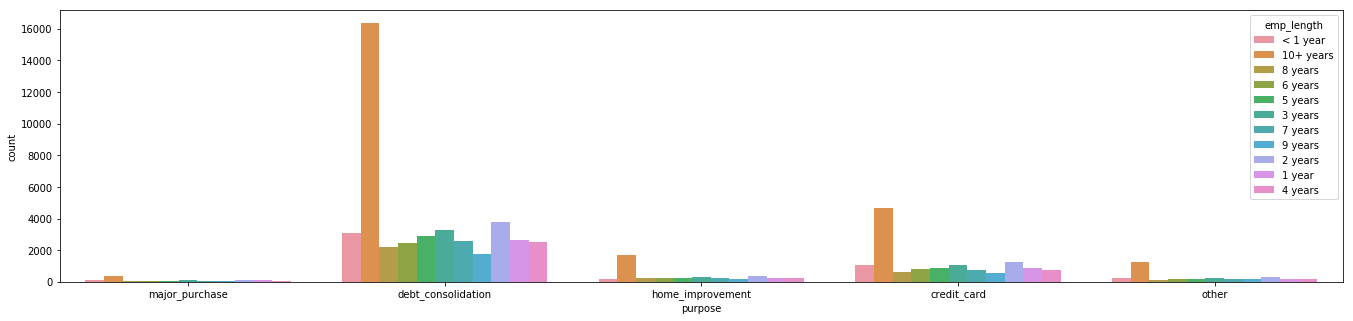

In [12]:
sns.countplot(x=data[data['purpose'].isin(data['purpose'].value_counts().head().index)]['purpose'], hue='emp_length', data=data);

* Кредиты одобряют в большинстве случаям людям, работающим более 10 лет. 
* Достаточно большая доля кредитов берется для погашения предыдущих.

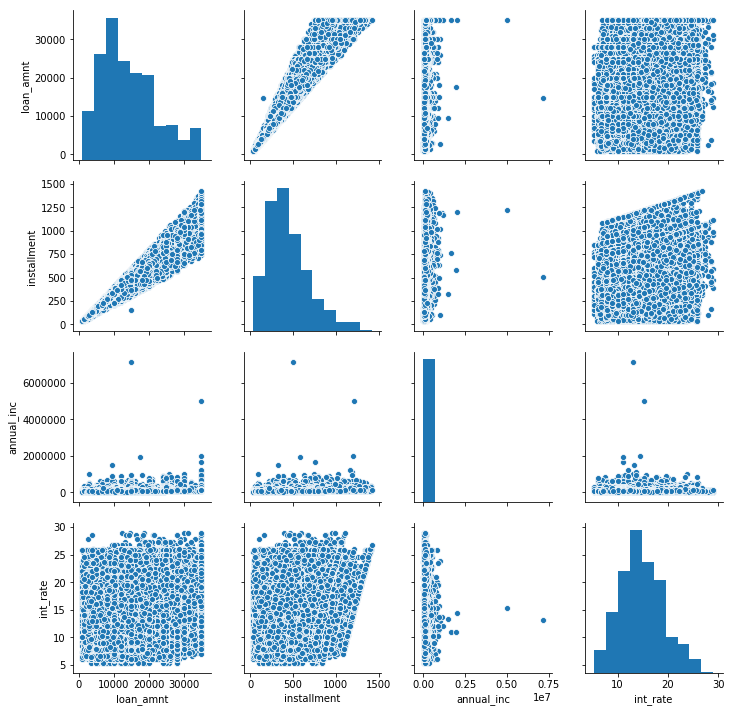

In [17]:
%config InlineBackend.figure_format = 'png' 
sns.pairplot(data[['loan_amnt', 'installment', 'annual_inc', 'int_rate']]);

* Чем больше сумма кредита, тем больше ежемесячный платёж.
* Существует условная граница между интересующей суммой кредита и ежемесячным платежом по этому кредиту.

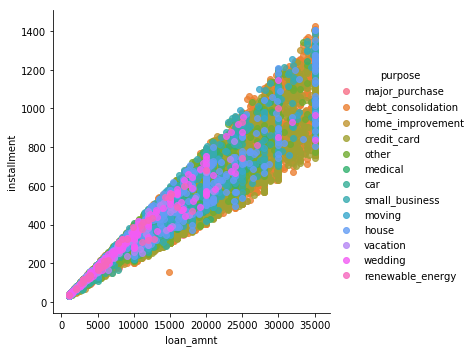

In [27]:
sns.lmplot('loan_amnt', 'installment', data=data, hue='purpose', fit_reg=False);

* На сввадьбы и отдых люди не берут большие кредиты.
* На приобретение домов берутся большие кредиты.

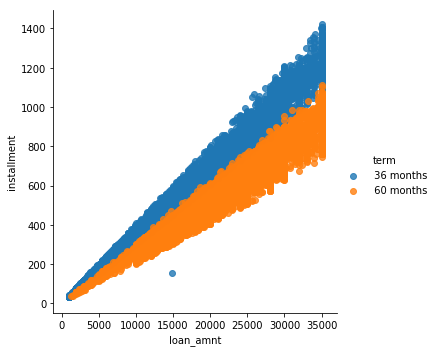

In [8]:
sns.lmplot('loan_amnt', 'installment', data=data, hue='term', fit_reg=False);

* На кредиты, расчитанные на 60 месяцев, ежемесячный платёж меньше.

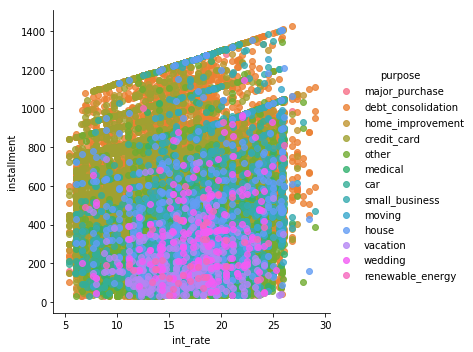

In [12]:
sns.lmplot('int_rate', 'installment', data=data, hue='purpose', fit_reg=False);

* На свадьбы и отдых люди предполчитают брать не самые большие и не самые маленькие кредиты с небольшим ежемесячным платежом.

In [37]:
# X = data[['int_rate', 'installment', 'loan_amnt']]

# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(X)

# tsne = TSNE(random_state=17)
# tsne_repr = tsne.fit_transform(x_scaled)

# plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1]);

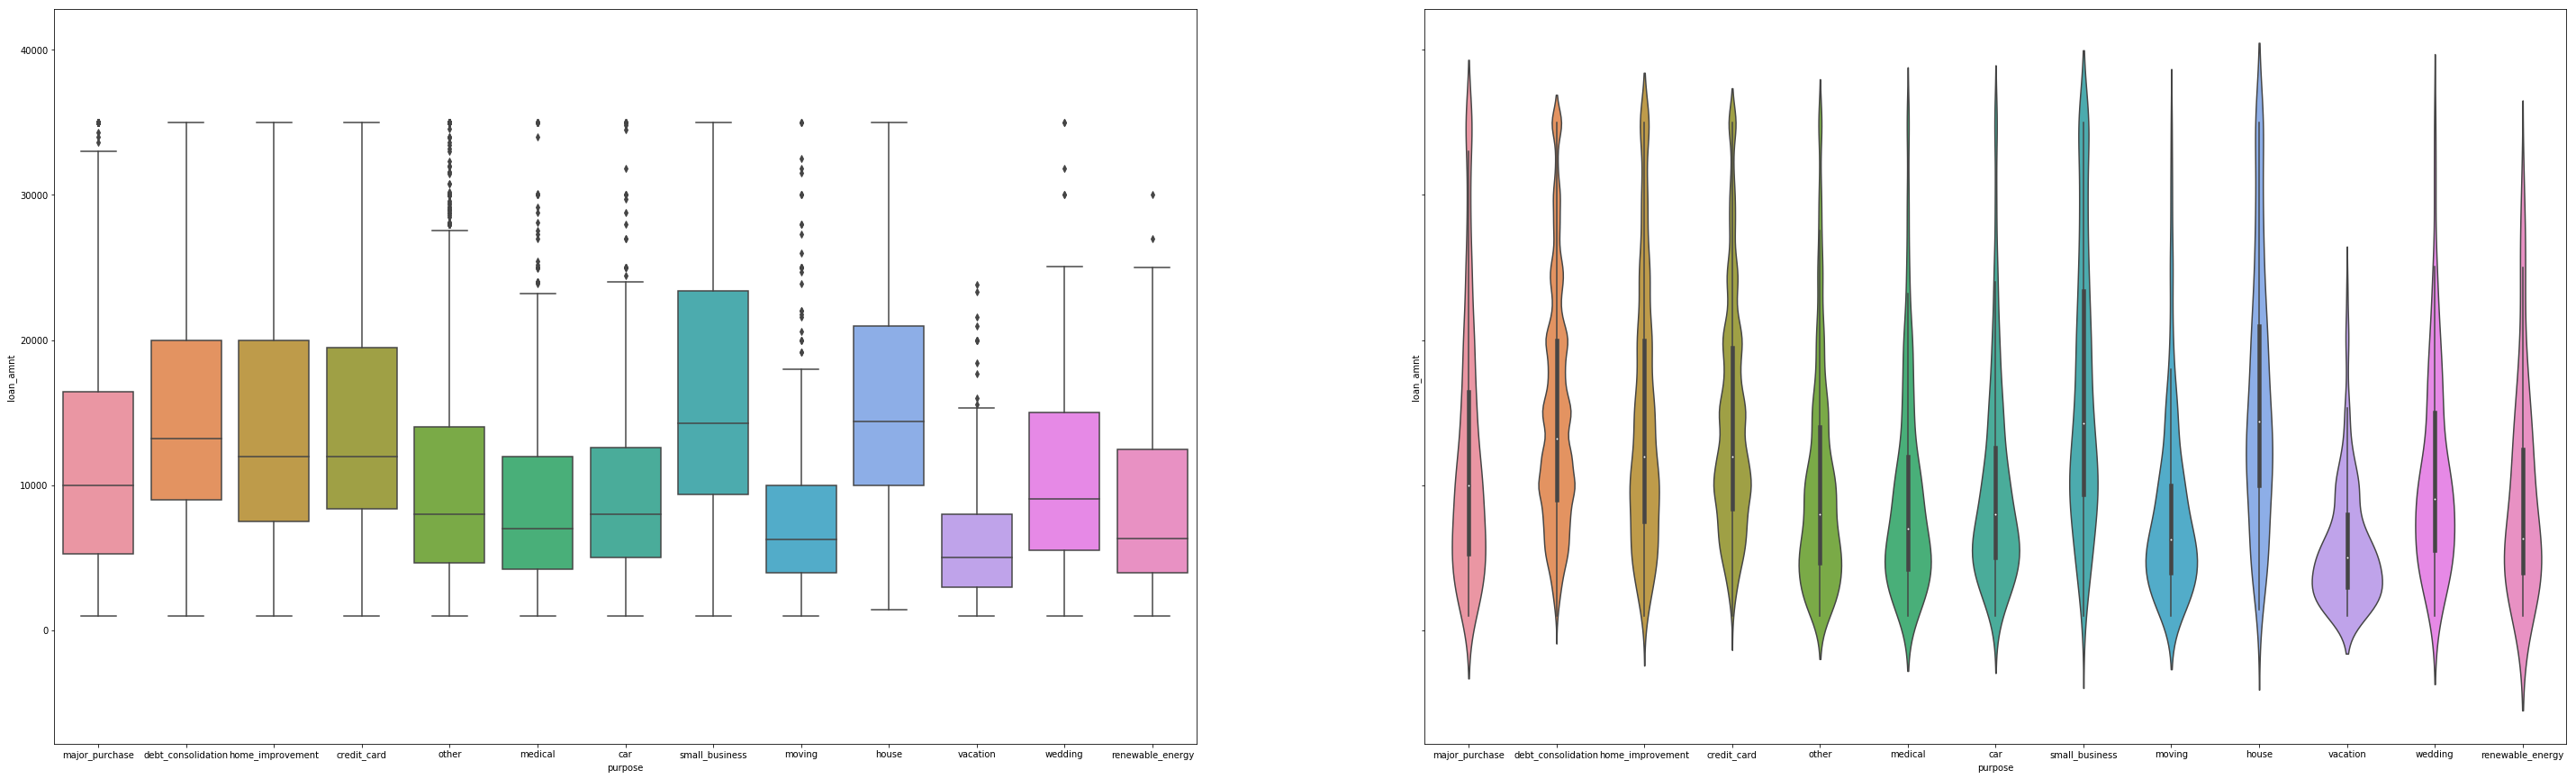

In [20]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(50, 15)) 
sns.boxplot(x='purpose', y='loan_amnt',
            data=data, ax=axes[0]);
sns.violinplot(x='purpose', y='loan_amnt', 
               data=data, ax=axes[1]);

* На приобретение домов и малого бизнеса средние кредиты самые высокие.
* На отдых и переезды средние кредиты достаточно небольшие.